# Problem Statement

   Build an algorithm/model that can quantify the degree of similarity between the two text-based on 
   Semantic similarity. Semantic Textual Similarity (STS) assesses the degree to which two sentences are 
   semantically equivalent to each other.

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Read & Understand the data

In [7]:
df = pd.read_csv("C:/Users/Suman/Downloads/DataNeuron_DataScience_Task1/DataNeuron_DataScience_Task1/DataNeuron_Text_Similarity.csv")
df.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


In [8]:
df.shape

(3000, 2)

In [9]:
copydata = df.copy()
copydata.shape

(3000, 2)

In [11]:
copydata.isnull().sum()

text1    0
text2    0
dtype: int64

### Preprocessing

In [12]:
copydata.head()

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...


#### Functions used in notebook
     1.Remove Punctuation
     2.Lower Case
     3.Tokenize
     4.Remove Stop Words
     5.Remove Digits
     6.Lemmatize
     7.Remove empty tokens
     8.Remove single meaningless letters
     9.Detokenize
     10.Remove Spaces
     11.Count Vectorizer + Cosine Similarity

In [13]:
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['text1']=df['text1'].map(lambda m:re.sub(pattern," ",m))
  copydata['text2']=df['text2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['text1']=copydata['text1'].map(lambda m:m.lower())
  copydata['text2']=copydata['text2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: tokenization(x))
  copydata['text2']= copydata['text2'].apply(lambda x: tokenization(x))
  return copydata


sw=nltk.corpus.stopwords.words('english')

def remove_SW(copydata):
   copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if item not in sw])
   copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if item not in sw])
   return copydata

def remove_digits(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['text2']=copydata['text2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata

def remove_empty_tokens(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if item !=''])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['text1']=copydata['text1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['text2']=copydata['text2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['text2']= copydata['text2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['text1']= copydata['text1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['text2']= copydata['text2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr():
  for i in range(len(copydata)):
    doc1=copydata['text1'][i]
    doc2=copydata['text2'][i]
    docs=(doc1,doc2)
    matrix = CountVectorizer().fit_transform(docs)
    cosine_sim = cosine_similarity(matrix[0], matrix[1])
    similarity.append(cosine_sim)
  return similarity

def similarity_fn():
  for i in range(len(copydata)):
    doc1=copydata['text1'][i]
    doc2=copydata['text2'][i]
    docs=(doc1,doc2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity.append(cosine_sim)
  return similarity

### Preprocessing pipeline

In [14]:
copydata=copydata.pipe(remove_punc).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

### Word Cloud
##### Stack and Concatinate both texts creating a combined Word Cloud

In [15]:
def stack_concat():
  stack1=copydata['text1'].apply(pd.Series).stack()
  stack2=copydata['text2'].apply(pd.Series).stack()
  temp=pd.concat([stack1,stack2])
  return temp
ct=stack_concat()
stacked=ct.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

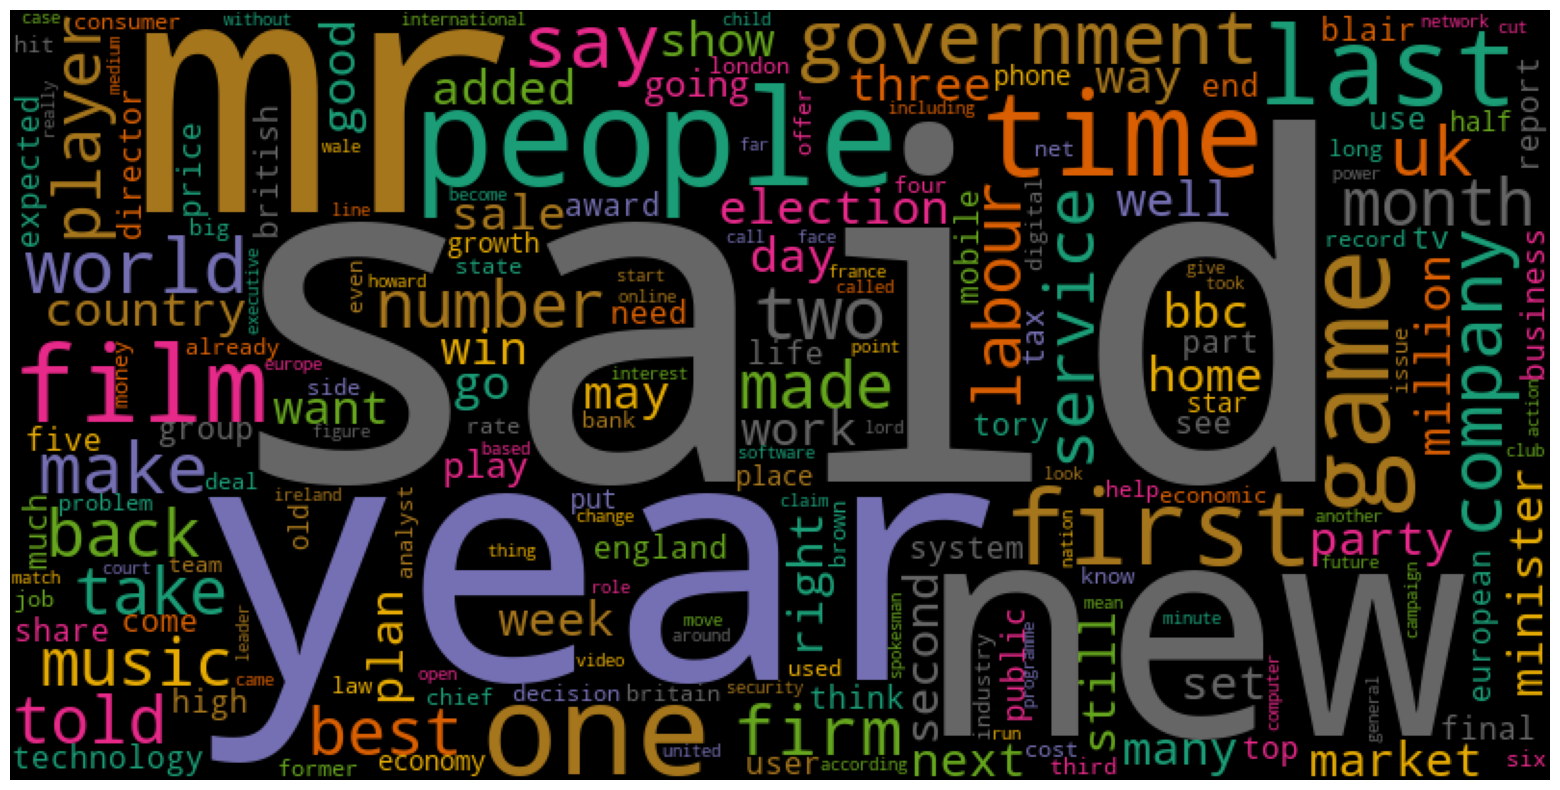

In [16]:
word_cloud = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked)
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud)
plt.axis("off")

### Count Vecotrizer and Cosine Similarity

In [17]:
bow_converter = CountVectorizer()
copydata.pipe(detoken).pipe(remove_space)
similarity=[]
similarity=count_vcr()
data_cvr=copydata.copy()
data_cvr['Similarity']=similarity
data_cvr[:5]

,text1,text2,Similarity
0,broadband challenge tv viewing number european...,gardener win double glasgow britain jason gard...,[[0.11225730287187921]]
1,rap bos arrested drug find rap mogul marion su...,amnesty chief lament war failure lack public o...,[[0.03676246991128057]]
2,player burn worry robinson england coach andy ...,hank greeted wintry premiere hollywood star to...,[[0.06682109510306634]]
3,heart oak cotonsport heart oak set ghanaian co...,redford vision sundance despite sporting cordu...,[[0.03993800591673614]]
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory la amelie mauresmo maria...,[[0.09826473199208315]]


In [20]:
Final_data=data_cvr.copy()
Final_data.head()

,text1,text2,Similarity
0,broadband challenge tv viewing number european...,gardener win double glasgow britain jason gard...,[[0.11225730287187921]]
1,rap bos arrested drug find rap mogul marion su...,amnesty chief lament war failure lack public o...,[[0.03676246991128057]]
2,player burn worry robinson england coach andy ...,hank greeted wintry premiere hollywood star to...,[[0.06682109510306634]]
3,heart oak cotonsport heart oak set ghanaian co...,redford vision sundance despite sporting cordu...,[[0.03993800591673614]]
4,sir paul rock super bowl crowd sir paul mccart...,mauresmo open victory la amelie mauresmo maria...,[[0.09826473199208315]]
